In [340]:
# Import of packages
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math

In [364]:
def kernel(x, y, typeKer = "linear", p = 4, sigma = 0.5, kappa = 0.1, delta = 0.2):
    if typeKer == "linear":
        k = np.dot(x,y) + 1
    elif typeKer == "poly":
        k = (np.dot(x,y) + 1) ** p
    elif typeKer == "radial":
        k = math.exp(-(np.dot(x-y,x-y))/(2*sigma))
    elif typeKer == "sigmoid":
        k = math.atanh(kappa * np.dot(x,y) - delta)

    return k

In [365]:
def lagrange(params, eps, X, t, K):
    N2 = np.shape(params)[0]
    N = int(N2/2)
    a = params[0:N].reshape((N,1))
    a_hat = params[N:N2].reshape((N,1))
    t = t.reshape((N,1))
    L = (1/2) * (a - a_hat).T.dot(K).dot(a - a_hat) + eps * np.sum(a + a_hat) - (a - a_hat).T.dot(t)
    return L   

In [366]:
N = 50
tr = 0.6
ts = 0.4
N_tr = int(N*tr)
N_ts = int(N*ts)
x = np.linspace(0,5,num=N)
y = 3 * x + 2 + np.random.normal(loc=0, scale=1, size=N)
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_ts = x[N_ts:N]
y_ts = y[N_ts:N]

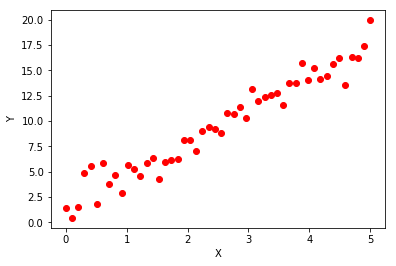

In [367]:
plt.plot(x,y, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [458]:
eps = 1.47
C = 0.19
initial = np.zeros(2*N_tr)
K = np.zeros((N_tr,N_tr))
for i in range(N_tr):
    for j in range(N_tr):
        K[i,j] = kernel(x_tr[i],x_tr[j])
args = (eps, x_tr, y_tr, K)
bounds = []
for i in range(0,2*N_tr):
    bounds.append((0,C))
    
def constraint(values):
    N2 = np.shape(values)[0]
    N = int(N2/2)
    a = values[0:N].reshape((N,1))
    a_hat = values[N:N2].reshape((N,1))
    return np.sum(a - a_hat) 

cons = {'type':'eq', 'fun':constraint}

final = optimize.minimize(lagrange, initial, args, bounds=bounds, constraints=cons, method='SLSQP')
a = final.x[0:N_tr]
a_hat = final.x[N_tr:2*N_tr]
for i in range(0,N_tr):
    if (a[i] < C and a[i] > 0):
        tn = y_tr[i]
        ind = i
        break
b = tn - eps - (a - a_hat).T.dot(K)[ind]
cond_valuable = (a - a_hat) > 1e-15
a = a[cond_valuable]
a_hat = a_hat[cond_valuable]
x_sv = x_tr[cond_valuable]
print(a)
print(a_hat)
print(np.sum(a-a_hat))

[  1.90000000e-01   3.86669863e-14   1.90000000e-01   1.90000000e-01
   1.90000000e-01   1.90000000e-01   1.90000000e-01]
[ 0.  0.  0.  0.  0.  0.  0.]
1.14


In [459]:
def pred(a, a_hat, b, x_sv, x_ts, kernel):
    N_sv = np.shape(a)[0]
    N_ts = np.shape(x_ts)[0]
    a = a.reshape(N_sv,1)
    a_hat = a_hat.reshape(N_sv,1)
    print(N_sv)
    print(N_ts)
    print(np.shape((a-a_hat).T))
    K = np.zeros((N_sv, N_ts))
    print(np.shape(K))
    for i in range(N_sv):
        for j in range(N_ts):
            K[i,j] = kernel(x_sv[i],x_ts[j])
    y_ts = (a - a_hat).T.dot(K) + b
    y_ts = y_ts.reshape(-1)
    return y_ts
    
    

In [460]:
y_pred = pred(a, a_hat, b, x_sv, x_ts, kernel)

7
30
(1, 7)
(7, 30)


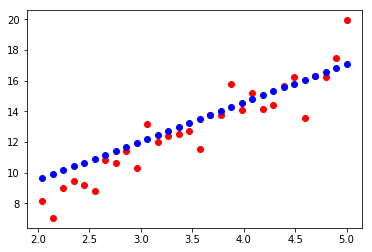

In [461]:
plt.plot(x_ts, y_ts,'ro')
plt.plot(x_ts, y_pred, 'bo')
plt.show()

In [462]:
(y_pred[N_ts]-y_pred[0]) / (x_ts[N_ts] - x_ts[0])

2.5204081632601296

In [296]:
(y_ts[N_ts]-y_ts[0]) / (x_ts[N_ts] - x_ts[0])

2.0586003476560606

In [268]:
200/3

66.66666666666667

In [398]:
np.sqrt(np.var(x))

1.4725377234348789